### Deliverable 1: Preprocessing the Data for a Neural Network

#### Import dependencies.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import tensorflow as tf

import pandas as pd 


In [2]:
# addtional Dependencies to Visualize data druring EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

#### Import the input dataset.

#### Generate categorical variable list.

In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# look at data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# look at the shape
application_df.shape

(34299, 12)

In [6]:
# Drop the non-beneficial ID columns, 'EIN'and 'NAME'.
application_df = application_df.drop(["EIN"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# look at the shape
application_df.shape

(34299, 11)

In [8]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

#### Determine the number of unique values in each column.

In [9]:
# Determine the number of unique values in each column.
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [10]:
# Determine the number of unique values in each column.
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [11]:
# Drop the non-beneficial ID columns, 'STATUS' and 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

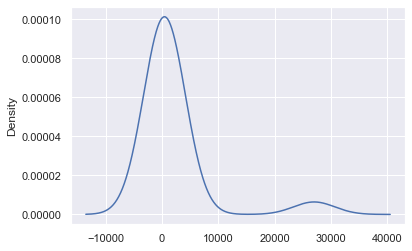

In [13]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
plt.savefig('./Images/Density_1_D34.png')

In [14]:
replace_application = list(application_counts[application_counts < 500].index)

In [15]:
# Determine which values to replace if counts are less than ...? less than 100
replace_application = list(application_counts[application_counts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

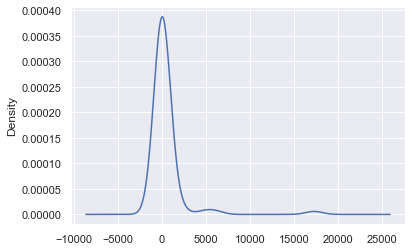

In [17]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()
plt.savefig('./Images/Density_2_D34.png')

In [18]:
class_counts < 1000

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C4120     True
C8210     True
C2561     True
C4500     True
C2150     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [19]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [20]:
# Determine which values to replace if counts are less than ..? 1000
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [22]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


In [23]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [24]:
# Testing
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,0


### Bin Names

In [25]:
# look at NAME valuew counts for binning
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

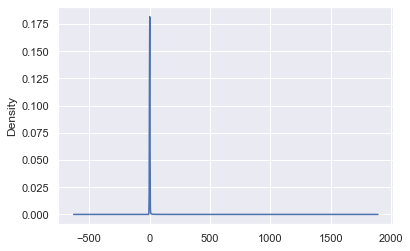

In [26]:
# visualize the value counts of NAME
name_counts.plot.density()

In [27]:
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [28]:
name_counts[((name_counts <= 100) & (name_counts > 5))]


AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
OLD OAK CLIFF CONSERVATION LEAGUE INC                       6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                      6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC                   6
PROFESSIONAL LOADMASTER ASSOCIATION                         6
CBMC INC                                                    6
Name: NAME, Length: 324, dtype: int64

In [29]:
len(name_counts[name_counts > 100])

30

In [30]:
replace_application = list(name_counts[name_counts <= 5].index)

In [31]:
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Other")

In [32]:
application_df.NAME.value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [33]:
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [34]:
# test
[application_df.dtypes == "object"]

[NAME                 True
 APPLICATION_TYPE     True
 AFFILIATION          True
 CLASSIFICATION       True
 USE_CASE             True
 ORGANIZATION         True
 INCOME_AMT           True
 ASK_AMT             False
 IS_SUCCESSFUL       False
 dtype: bool]

In [35]:
application_df.dtypes[application_df.dtypes == "object"].index.tolist()

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [36]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [37]:
# Testing
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0


#### Create a OneHotEncoder instance.

In [38]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

#### Fit and transform the OneHotEncoder.

In [39]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

#### Add the encoded variable names to the DataFrame.

In [40]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Merge one-hot encoded features and drop the originals.

In [41]:
#### Merge one-hot encoded features and drop the originals.
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
application_df.shape

(34299, 396)

In [43]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 396 entries, ASK_AMT to INCOME_AMT_5M-10M
dtypes: float64(394), int64(2)
memory usage: 103.6 MB


#### Split the preprocessed data into training and testing dataset.

In [44]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values

C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Split the preprocessed data into features and target arrays.

In [45]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train[:1]

array([[5.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 

#### Create a StandardScaler instance.

In [46]:
# Create a StandardScaler instances
scaler = StandardScaler()

#### Fit the StandardScaler.

In [47]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

#### Scale the data.

In [48]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

#### Define the model.

In [49]:
len(X_train[0])

395

In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1


nn = tf.keras.models.Sequential()

#### Add first and second hidden layers.

In [51]:
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

In [52]:
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


In [53]:
# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


#### Add the output layer.

In [54]:
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#### Check the structure of the model.

In [55]:
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1185)              469260    
                                                                 
 dense_1 (Dense)             (None, 790)               936940    
                                                                 
 dense_2 (Dense)             (None, 395)               312445    
                                                                 
 dense_3 (Dense)             (None, 1)                 396       
                                                                 
Total params: 1,719,041
Trainable params: 1,719,041
Non-trainable params: 0
_________________________________________________________________


#### Implement CheckPoints
###### note:Create a callback that saves the model's weights every 5 epochs

In [56]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
Checkpoint_path = "Checkpoints/weights.{epoch:02d}.hdf5"

In [57]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=Checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch")

In [59]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
798/804 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.7804
Epoch 1: saving model to Checkpoints\weights.01.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4685 - accuracy: 0.7803
Epoch 2/100
804/804 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.7926
Epoch 2: saving model to Checkpoints\weights.02.hdf5
804/804 [==============================] - 9s 12ms/step - loss: 0.4360 - accuracy: 0.7926
Epoch 3/100
800/804 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.7952
Epoch 3: saving model to Checkpoints\weights.03.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4307 - accuracy: 0.7948
Epoch 4/100
804/804 [==============================] - ETA: 0s - loss: 0.4284 - accuracy: 0.7965
Epoch 4: saving model to Checkpoints\weights.04.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.4284 - accuracy: 0.7965
Epoch 5/100
801/804 [===================

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4983 - accuracy: 0.7907 - 1s/epoch - 5ms/step
Loss: 0.49834486842155457, Accuracy: 0.7906705737113953


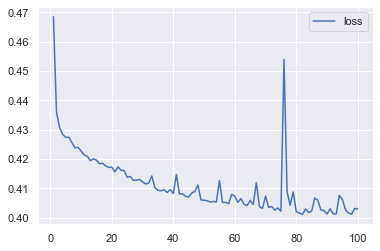

In [61]:
# cretae a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# plot the loss
history_df.plot(y="loss")
plt.savefig('./Images/HistoryD34.png')

In [62]:
# Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity_d34.h5")

### Random Forest Classifier


In [63]:
# import Dependencies
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 

In [64]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=1) 

In [65]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [66]:
y_pred = rf_model.predict(X_test_scaled)
print(f"Random Forest predictive accuracy:{accuracy_score(y_test, y_pred):.3f}")

Random Forest predictive accuracy:0.776


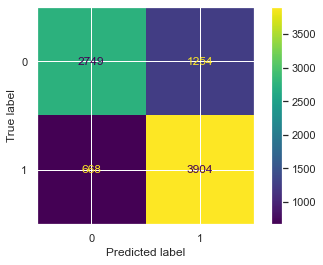

In [67]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf_model.classes_)
disp.plot()
plt.savefig('./Images/RandomForestClassifer_CM_D34.png')
plt.show()

In [68]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      4003
           1       0.76      0.85      0.80      4572

    accuracy                           0.78      8575
   macro avg       0.78      0.77      0.77      8575
weighted avg       0.78      0.78      0.77      8575



In [69]:
# create feature importances from model
importances = rf_model.feature_importances_
